In [3]:
import sqlite3
import matplotlib.pyplot as plt

# 常量
c = 3e8  # 光速，单位：m/s
lambda_532 = 532e-9  # m
lambda_800 = 800e-9  # m

# 角频率（rad/s）
omega_532 = 2 * 3.141592653589793 * c / lambda_532
omega_800 = 2 * 3.141592653589793 * c / lambda_800
delta_omega = omega_800 - omega_532  # 用于近似色散公式

# 连接数据库
conn = sqlite3.connect('D:/WORK/Achromatic_metalens_design_in_Windows/data/Main.db')  # 替换为你的数据库文件名
cursor = conn.cursor()

# 读取数据（假设表名为 'nanostructures'，请根据实际修改）
cursor.execute("SELECT angleIn532, angleIn800 FROM Parameter")
rows = cursor.fetchall()

# 存储数据
phi_532_list = []
delta_phi_list = []

for row in rows:
    phi_532, phi_800 = row

    # 基本检查防止空值
    if phi_532 is None or phi_800 is None:
        continue

    delta_phi = phi_800 - phi_532

    phi_532_list.append(phi_532)
    delta_phi_list.append(delta_phi)

# 关闭连接
conn.close()


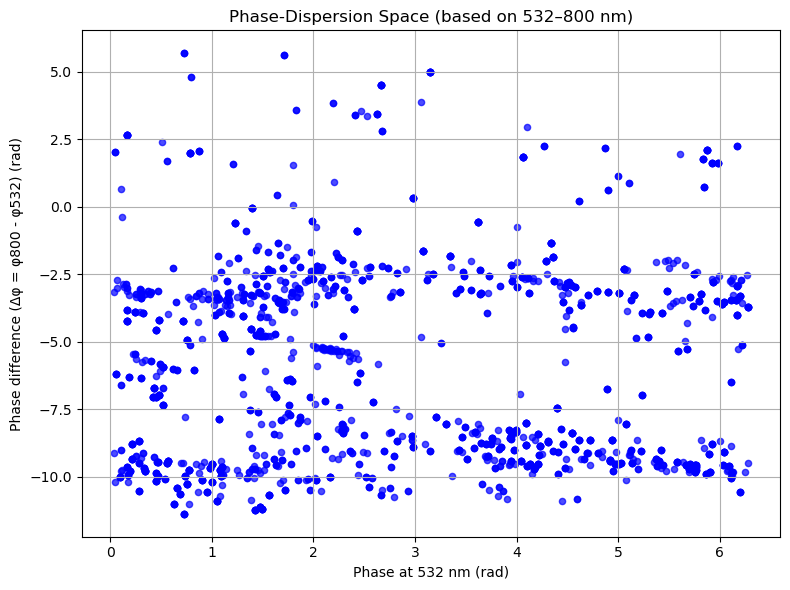

In [4]:
# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(phi_532_list, delta_phi_list, c='blue', alpha=0.7, s=20)
plt.xlabel("Phase at 532 nm (rad)")
plt.ylabel("Phase difference (Δφ = φ800 - φ532) (rad)")
plt.title("Phase-Dispersion Space (based on 532–800 nm)")
plt.grid(True)
plt.tight_layout()
plt.show()